In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/jckim/workspace/ASFormer')

In [3]:
dataset = 'gtea' 
mode='rand'
train_mode=''

result_dir='results'
testing='y'
ndir='/data/jckim/data/'

if train_mode != '':
   result_dir=f'results_{train_mode}'
if mode != '':
  testing='n'
  result_dir += f'_{mode}'
  tdir=f'/data/jckim/data_{mode}/' # /data/jckim/data_mode/

if dataset == '50salads':
    split = 5
else:
    split = 4

In [4]:
def read_file(path):
    with open(path, 'r') as f:
        content = f.read()
        f.close()
    return content

In [5]:
if dataset=='gtea':
  # lists={'take': 'background', "close": "put", "open": "background"}
  lists = {"close": "put"}
# elif dataset=='50salads':
#   lists={'cut_tomato': 'place_tomato_into_bowl', "peel_cucumber": "cut_cucumber", "cut_cucumber" :'place_cucumber_into_bowl', \
# 'cut_lettuce': 'place_lettuce_into_bowl'}
# else:
#   lists={"pour_dough2pan": "fry_pancake", "put_egg2plate": "SIL", "cut_orange": "squeeze_orange", "put_bunTogether": "SIL"}
elif dataset=='breakfast':  
  lists = {"pour_dough2pan": "fry_pancake"}
  
    

In [6]:
if dataset=='gtea':
  label='close'
elif dataset=='50salads':
  label='cut_tomato'
else:
  label="pour_dough2pan"

In [7]:
correct_gt = 0
total_gt = 0
a=0
b=0
ground_truth_counts = {}
prediction_counts = {}

for s in range(1, split+1):
  recog_path = "./{}/".format(result_dir)+dataset+"/split_{}".format(s)+"/"
  file_list = ndir +dataset+"/splits/test.split{}".format(s)+".bundle"
  if testing == 'y':
    ground_truth_path = tdir + dataset + "/groundTruth/"
    mapping_file = ndir + dataset + "/mapping.txt"
    list_of_videos = read_file(file_list).split('\n')[:-1]
  else:
    ground_truth_path = ndir + dataset + "/groundTruth/"
    mapping_file = ndir + dataset + "/mapping.txt"
    list_of_videos = read_file(file_list).split('\n')[:-1]

  for vid in list_of_videos:
    gt_file = ground_truth_path + vid
    gt_content = read_file(gt_file).split('\n')[0:-1]
    new_list = []
    last_element = None
    for element in gt_content:
      if element != last_element:
        new_list.append(element)
        last_element = element
    gt_content = new_list
    
    if testing == 'y':
      recog_file = str("/".join(recog_path.split('/')[:-2])) + '/' + str(recog_path.split('/')[-2] + '/' + vid.split('.')[0])
    else:
      recog_file = recog_path  + vid.split('.')[0]
    recog_content = read_file(recog_file).split('\n')[1].split()
    new_list = []
    last_element = None
    for element in recog_content:
      if element != last_element:
        new_list.append(element)
        last_element = element
    recog_content = new_list

    for i in range(len(gt_content)-1):
      if gt_content[i] in lists.keys():
        total_gt += 1
        if gt_content[i+1] == lists[gt_content[i]]:
          correct_gt += 1
      if gt_content[i] == label:
        if gt_content[i+1] in ground_truth_counts.keys():
          ground_truth_counts[gt_content[i+1]] += 1
        else:
          ground_truth_counts[gt_content[i+1]] = 1
    
    for i in range(len(recog_content)-1):
      if recog_content[i] in lists.keys():
        a += 1
        if recog_content[i+1] == lists[recog_content[i]]:
          b += 1
      if recog_content[i] == label:
        if recog_content[i+1] in prediction_counts.keys():
          prediction_counts[recog_content[i+1]] += 1
        else:
          prediction_counts[recog_content[i+1]] = 1

        


In [8]:
real_counts={}

for s in range(1, split+1):
  recog_path = "./{}/".format(result_dir)+dataset+"/split_{}".format(s)+"/"
  file_list = ndir +dataset+"/splits/test.split{}".format(s)+".bundle"
  ground_truth_path = ndir + dataset + "/groundTruth/"
  mapping_file = ndir + dataset + "/mapping.txt"
  list_of_videos = read_file(file_list).split('\n')[:-1]

  for vid in list_of_videos:
    gt_file = ground_truth_path + vid
    gt_content = read_file(gt_file).split('\n')[0:-1]

    new_list = []
    last_element = None
    for element in gt_content:
      if element != last_element:
        new_list.append(element)
        last_element = element
    gt_content = new_list

    
    if testing == 'y':
      recog_file = str("/".join(recog_path.split('/')[:-2])) + '/' + str(recog_path.split('/')[-2] + '/' + vid.split('.')[0])
    else:
      recog_file = recog_path  + vid.split('.')[0]
    recog_content = read_file(recog_file).split('\n')[1].split()

    new_list = []
    last_element = None
    for element in recog_content:
      if element != last_element:
        new_list.append(element)
        last_element = element
    recog_content = new_list

    for i in range(len(gt_content)-1):
      if gt_content[i] == label:
        if gt_content[i+1] in real_counts.keys():
          real_counts[gt_content[i+1]] += 1
        else:
          real_counts[gt_content[i+1]] = 1

{'put': 64, 'background': 3}
{'put': 54, 'background': 7, 'open': 3, 'stir': 1}
{'put': 64, 'background': 3}


[Text(0, 0, 'background'),
 Text(1, 0, 'open'),
 Text(2, 0, 'put'),
 Text(3, 0, 'stir')]

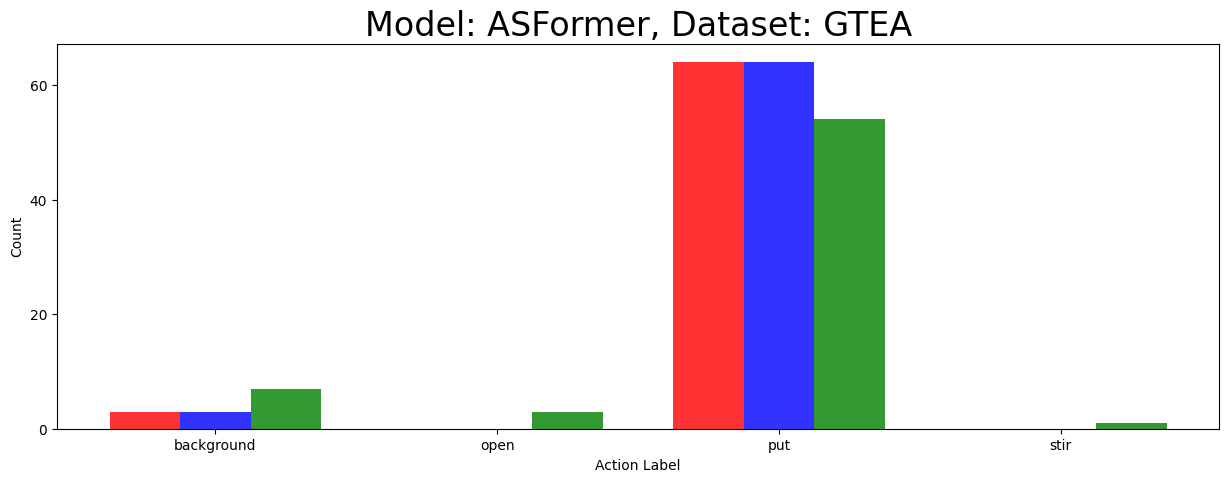

In [9]:
print(ground_truth_counts)
print(prediction_counts)
print(real_counts)

# Get unique keys from both dictionaries
keys = set(list(real_counts.keys()) + list(ground_truth_counts.keys()) + list(prediction_counts.keys()))

# Extract values for each key from both dictionaries
real_vals = [real_counts.get(key, 0) for key in keys]
groundtruth_vals = [ground_truth_counts.get(key, 0) for key in keys]
prediction_vals = [prediction_counts.get(key, 0) for key in keys]

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 5))
plt.rc('font', size=20) 
index = range(len(keys))
bar_width = 0.25
opacity = 0.8

# Create bars for ground truth

groundtruth_bars = ax.bar(index, groundtruth_vals, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ground Truth')

real_bars = ax.bar([i - bar_width for i in index], real_vals, bar_width,
                  alpha=opacity,
                  color='r',
                  label='Original')

# Create bars for prediction
prediction_bars = ax.bar([i + bar_width for i in index], prediction_vals, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Prediction')

# Add labels, title, and legend
ax.set_xlabel('Action Label')
ax.set_ylabel('Count')
ax.set_title('Model: ASFormer, Dataset: GTEA')
ax.set_xticks([i for i in index])
ax.set_xticklabels(keys)
# ax.legend()

In [10]:
print(correct_gt/total_gt)
print(b/a)
print(total_gt, correct_gt)

0.9552238805970149
0.8307692307692308
67 64
